In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import Ridge, RidgeClassifier, ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import time

In [311]:
df

,Name,Loan_Term,Number_Of_Employees,Business_Type,Urban_Rural_Status,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,Loan_Status,Region,Franchise_Status,Month_Of_Approval
0,ABC HOBBYCRAFT,84,4,New,Unknown,0,1,60000,1,Midwest,0,February
1,LANDMARK BAR & GRILLE (THE),60,2,New,Unknown,0,1,40000,1,Midwest,0,February
2,"WHITLOCK DDS, TODD M.",180,7,Existing,Unknown,0,0,287000,1,Midwest,0,February
3,"BIG BUCKS PAWN & JEWELRY, LLC",60,2,Existing,Unknown,0,1,35000,1,South,0,February
4,"ANASTASIA CONFECTIONS, INC.",240,14,Existing,Unknown,0,0,229000,1,South,0,February
...,...,...,...,...,...,...,...,...,...,...,...,...
872914,FABRIC FARMS,60,6,Existing,Unknown,0,0,70000,1,Midwest,0,February
872915,FABRIC FARMS,60,6,Existing,Unknown,1,0,85000,1,Midwest,0,February
872916,"RADCO MANUFACTURING CO.,INC.",108,26,Existing,Unknown,0,0,300000,1,West,0,February
872917,"MARUTAMA HAWAII, INC.",60,6,Existing,Unknown,0,1,75000,0,West,0,February


In [309]:
df_new

,NAICS_U.S._Industry_Title,Loan_Term,Number_Of_Employees,Business_Type,Urban_Rural_Status,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,Loan_Status,Region,Franchise_Status,Month_Of_Approval
0,RetailTrade,84,4,New,Unknown,0,1,60000,1,Midwest,0,February
1,Accommodation_FoodServices,60,2,New,Unknown,0,1,40000,1,Midwest,0,February
2,HealthCare_SocialAssistance,180,7,Existing,Unknown,0,0,287000,1,Midwest,0,February
3,Unknown,60,2,Existing,Unknown,0,1,35000,1,South,0,February
4,Unknown,240,14,Existing,Unknown,0,0,229000,1,South,0,February
...,...,...,...,...,...,...,...,...,...,...,...,...
872914,RetailTrade,60,6,Existing,Unknown,0,0,70000,1,Midwest,0,February
872915,RetailTrade,60,6,Existing,Unknown,1,0,85000,1,Midwest,0,February
872916,Manufacturing,108,26,Existing,Unknown,0,0,300000,1,West,0,February
872917,Unknown,60,6,Existing,Unknown,0,1,75000,0,West,0,February


In [ ]:
df_new_unknowns = pd.read_csv('../CSV/df_new_unknowns.csv', low_memory=False)

df_new = pd.read_csv('../CSV/df_new.csv', low_memory=False)

df = pd.read_csv('../CSV/df.csv', low_memory=False)

# Set display option to show all columns
pd.set_option('display.max_columns', None)

pd.set_option('mode.chained_assignment', None)

We will analyze two datasets to evaluate the impact of unknown values on our logistic regression model:
- **df_new:** The cleaned dataset where unknown values are retained.
- **df_new_unknowns:** The dataset with rows containing unknown values removed.

This comparison will help determine whether unknown values significantly affect model performance.

In [4]:
df_new_unknowns

,NAICS_U.S._Industry_Title,Loan_Term,Number_Of_Employees,Business_Type,Urban_Rural_Status,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,Loan_Status,Region,Franchise_Status,Month_Of_Approval
0,RetailTrade,162,2,New,Urban,0,0,253400,1,South,1,February
1,Accommodation_FoodServices,126,7,Existing,Urban,0,0,137300,1,South,0,February
2,Educational,83,18,New,Urban,1,0,438541,1,West,0,February
3,Construction,84,4,Existing,Urban,1,0,51440,1,South,0,February
4,RealEstate_Rental_Leasing,60,3,Existing,Urban,0,0,50000,1,South,0,February
...,...,...,...,...,...,...,...,...,...,...,...,...
532521,Construction,240,20,Existing,Urban,0,0,509000,1,West,0,February
532522,Information,84,3,Existing,Urban,1,0,15635,1,West,0,February
532523,Accommodation_FoodServices,240,10,Existing,Urban,0,0,1038000,1,Midwest,0,February
532524,Manufacturing,107,2,Existing,Rural,0,0,170000,0,West,0,January


In [5]:
df_new

,NAICS_U.S._Industry_Title,Loan_Term,Number_Of_Employees,Business_Type,Urban_Rural_Status,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,Loan_Status,Region,Franchise_Status,Month_Of_Approval
0,RetailTrade,84,4,New,Unknown,0,1,60000,1,Midwest,0,February
1,Accommodation_FoodServices,60,2,New,Unknown,0,1,40000,1,Midwest,0,February
2,HealthCare_SocialAssistance,180,7,Existing,Unknown,0,0,287000,1,Midwest,0,February
3,Unknown,60,2,Existing,Unknown,0,1,35000,1,South,0,February
4,Unknown,240,14,Existing,Unknown,0,0,229000,1,South,0,February
...,...,...,...,...,...,...,...,...,...,...,...,...
872914,RetailTrade,60,6,Existing,Unknown,0,0,70000,1,Midwest,0,February
872915,RetailTrade,60,6,Existing,Unknown,1,0,85000,1,Midwest,0,February
872916,Manufacturing,108,26,Existing,Unknown,0,0,300000,1,West,0,February
872917,Unknown,60,6,Existing,Unknown,0,1,75000,0,West,0,February


##### Dummy Encoding

We are using **dummy encoding** to transform categorical variables into numerical representations suitable for machine learning models. This process converts categories into binary (0 or 1) columns, allowing algorithms like logistic regression to process the data effectively. Dummy variables help maintain the interpretability of categorical data while ensuring compatibility with numerical modeling techniques.

**Why Certain Columns Are Excluded**

The following columns are excluded from dummy encoding:
- **Loan_Term**, **Number_Of_Employees**, **Disbursement_Gross**: These columns are numerical and do not require encoding.
- **Revolving_Line_Of_Credit**, **Low_Documentation_Loan_Program**: These columns already contain binary values (0 and 1) and do not need further transformation.
- **Loan_Status**: This column is the target variable (dependent variable) for our logistic regression model and should not be transformed.

By excluding these columns, we ensure that the essential structure of the data remains intact while focusing on converting only the necessary categorical features into dummy variables.

In [7]:
# Specify columns to exclude from dummy encoding
exclude_columns = [
    'Loan_Term', 
    'Number_Of_Employees', 
    'Revolving_Line_Of_Credit', 
    'Low_Documentation_Loan_Program', 
    'Disbursement_Gross', 
    'Loan_Status'
]

# Create dummy variables for all columns except those in exclude_columns
df_new_unknown_dummies = pd.get_dummies(df_new_unknowns, columns=[col for col in df_new_unknowns.columns if col not in exclude_columns], drop_first=True)

df_new_dummies = pd.get_dummies(df_new, columns=[col for col in df_new.columns if col not in exclude_columns], drop_first=True)

# Convert boolean columns to integer values (0 and 1)
for col in df_new_unknown_dummies.select_dtypes(include=['bool']).columns:
    df_new_unknown_dummies[col] = df_new_unknown_dummies[col].astype(int)

for col in df_new_dummies.select_dtypes(include=['bool']).columns:


In [8]:
df_new_unknown_dummies

,Loan_Term,Number_Of_Employees,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,Loan_Status,NAICS_U.S._Industry_Title_Administrative&Support_WasteManagement_RemediationServices,NAICS_U.S._Industry_Title_Agriculture_Forestry_Fishing_Hunting,NAICS_U.S._Industry_Title_Arts_Entertainment_Recreation,NAICS_U.S._Industry_Title_Construction,NAICS_U.S._Industry_Title_Educational,NAICS_U.S._Industry_Title_Finance_Insurance,NAICS_U.S._Industry_Title_HealthCare_SocialAssistance,NAICS_U.S._Industry_Title_Information,NAICS_U.S._Industry_Title_ManagementOfCompaniesAndEnterprises,NAICS_U.S._Industry_Title_Manufacturing,NAICS_U.S._Industry_Title_Mining_Quarrying_Oil&GasExtraction,NAICS_U.S._Industry_Title_OtherServices(except Public Administration),NAICS_U.S._Industry_Title_Professional_Scientific_TechService,NAICS_U.S._Industry_Title_PublicAdministration,NAICS_U.S._Industry_Title_RealEstate_Rental_Leasing,NAICS_U.S._Industry_Title_RetailTrade,NAICS_U.S._Industry_Title_Transportation_Warehousing,NAICS_U.S._Industry_Title_Utilities,NAICS_U.S._Industry_Title_WholesaleTrade,Business_Type_New,Urban_Rural_Status_Urban,Region_Northeast,Region_South,Region_West,Franchise_Status_1,Month_Of_Approval_August,Month_Of_Approval_December,Month_Of_Approval_February,Month_Of_Approval_January,Month_Of_Approval_July,Month_Of_Approval_June,Month_Of_Approval_March,Month_Of_Approval_May,Month_Of_Approval_November,Month_Of_Approval_October,Month_Of_Approval_September
0,162,2,0,0,253400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
1,126,7,0,0,137300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,83,18,1,0,438541,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,84,4,1,0,51440,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,3,0,0,50000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532521,240,20,0,0,509000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
532522,84,3,1,0,15635,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
532523,240,10,0,0,1038000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
532524,107,2,0,0,170000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [9]:
df_new_dummies

,Loan_Term,Number_Of_Employees,Revolving_Line_Of_Credit,Low_Documentation_Loan_Program,Disbursement_Gross,Loan_Status,NAICS_U.S._Industry_Title_Administrative&Support_WasteManagement_RemediationServices,NAICS_U.S._Industry_Title_Agriculture_Forestry_Fishing_Hunting,NAICS_U.S._Industry_Title_Arts_Entertainment_Recreation,NAICS_U.S._Industry_Title_Construction,NAICS_U.S._Industry_Title_Educational,NAICS_U.S._Industry_Title_Finance_Insurance,NAICS_U.S._Industry_Title_HealthCare_SocialAssistance,NAICS_U.S._Industry_Title_Information,NAICS_U.S._Industry_Title_ManagementOfCompaniesAndEnterprises,NAICS_U.S._Industry_Title_Manufacturing,NAICS_U.S._Industry_Title_Mining_Quarrying_Oil&GasExtraction,NAICS_U.S._Industry_Title_OtherServices(except Public Administration),NAICS_U.S._Industry_Title_Professional_Scientific_TechService,NAICS_U.S._Industry_Title_PublicAdministration,NAICS_U.S._Industry_Title_RealEstate_Rental_Leasing,NAICS_U.S._Industry_Title_RetailTrade,NAICS_U.S._Industry_Title_Transportation_Warehousing,NAICS_U.S._Industry_Title_Unknown,NAICS_U.S._Industry_Title_Utilities,NAICS_U.S._Industry_Title_WholesaleTrade,Business_Type_New,Business_Type_Unknown,Urban_Rural_Status_Unknown,Urban_Rural_Status_Urban,Region_Northeast,Region_South,Region_West,Franchise_Status_1,Month_Of_Approval_August,Month_Of_Approval_December,Month_Of_Approval_February,Month_Of_Approval_January,Month_Of_Approval_July,Month_Of_Approval_June,Month_Of_Approval_March,Month_Of_Approval_May,Month_Of_Approval_November,Month_Of_Approval_October,Month_Of_Approval_September
0,84,4,0,1,60000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,60,2,0,1,40000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,180,7,0,0,287000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60,2,0,1,35000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,240,14,0,0,229000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872914,60,6,0,0,70000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
872915,60,6,1,0,85000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
872916,108,26,0,0,300000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
872917,60,6,0,1,75000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


#### Logistic Regression

Now, we will perform logistic regression on both datasets:
- **df_new:** The dataset cleaned with unknown values included.
- **df_new_unknowns:** The dataset where rows with unknown values were removed.

By comparing the performance metrics of the logistic regression models for these two datasets, we can evaluate the impact of retaining or excluding unknown values on model accuracy, precision, recall, and overall effectiveness.

**Z-Score Normalization**

Before fitting the model, we will **Z-score normalize** the following columns:

- **Loan_Term**
- **Number_Of_Employees**
- **Disbursement_Gross**

Z-score normalization ensures these continuous variables are scaled to have a mean of 0 and a standard deviation of 1. This is critical for logistic regression because it:
- Ensures that all features contribute equally to the model, preventing those with larger numerical ranges from dominating the results.
- Improves the numerical stability and convergence of the optimization algorithm used in logistic regression.

Normalization will be applied **after splitting the datasets into training and test sets** to prevent data leakage and ensure that the scaling is based only on the training data.

Training Set Metrics:
Accuracy: 0.8475
Precision: 0.8581
Recall: 0.9778
F1 Score: 0.9140

Test Set Metrics:
Accuracy: 0.8481
Precision: 0.8585
Recall: 0.9780
F1 Score: 0.9144

Specificity (Training Set): 0.2178
Specificity (Test Set): 0.2165


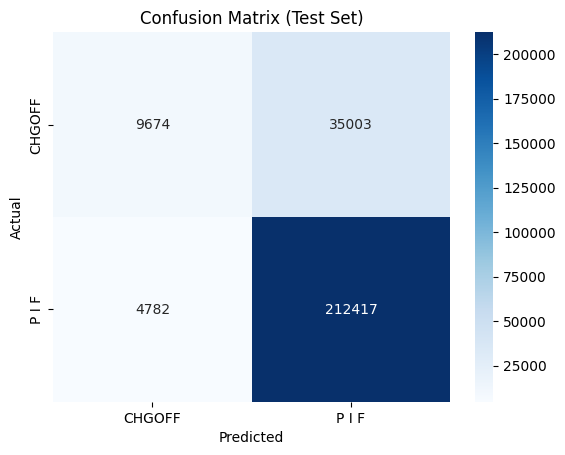

Total Net Profit/Loss: 1021859945.70
Average Total Net Profit/Loss: 3902.08


In [11]:
# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize specified columns in training and testing sets separately
scaler = StandardScaler()

# Fit on training data and transform training data
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Transform test data using the same scaler
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Fit the logistic regression model with class weights
logreg = LogisticRegression(max_iter=1000) 
logreg.fit(X_train, y_train)  # Train the model on the training data

# Step 5: Make predictions for both training and test sets
y_train_pred = logreg.predict(X_train)  # Predict on the training set
y_test_pred = logreg.predict(X_test)  # Predict on the test set

# Step 6: Evaluate the model for both training and test sets
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)  # Accuracy
    precision = precision_score(y_true, y_pred)  # Precision
    recall = recall_score(y_true, y_pred)  # Recall
    f1 = f1_score(y_true, y_pred)  # F1 Score
    return accuracy, precision, recall, f1

# Evaluate on training set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# Display the evaluation metrics for both sets
print("Training Set Metrics:")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')

# Step 7: Confusion Matrix for both sets

# For training set
cm_train = confusion_matrix(y_train, y_train_pred)  # Compute confusion matrix for training set
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

# For test set
cm_test = confusion_matrix(y_test, y_test_pred)  # Compute confusion matrix for test set
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Display Specificity for both sets
print(f'\nSpecificity (Training Set): {specificity_train:.4f}')
print(f'Specificity (Test Set): {specificity_test:.4f}')

# Plot confusion matrix for the test set as a heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

Training Set Metrics:
Accuracy: 0.8091
Precision: 0.8303
Recall: 0.9442
F1 Score: 0.8836

Test Set Metrics:
Accuracy: 0.8081
Precision: 0.8294
Recall: 0.9439
F1 Score: 0.8829

Specificity (Training Set): 0.3630
Specificity (Test Set): 0.3617


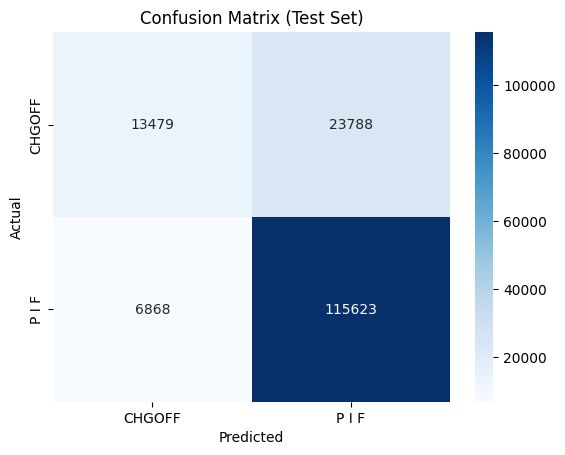

Total Net Profit/Loss: 88134464.00
Average Total Net Profit/Loss: 551.67


In [12]:
# Step 1: Define features (X) and target (y)
X = df_new_unknown_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_unknown_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize specified columns in training and testing sets separately
scaler = StandardScaler()

# Fit on training data and transform training data
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Transform test data using the same scaler
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Fit the logistic regression model with class weights
logreg = LogisticRegression(max_iter=1000) 
logreg.fit(X_train, y_train)  # Train the model on the training data

# Step 5: Make predictions for both training and test sets
y_train_pred = logreg.predict(X_train)  # Predict on the training set
y_test_pred = logreg.predict(X_test)  # Predict on the test set

# Step 6: Evaluate the model for both training and test sets
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)  # Accuracy
    precision = precision_score(y_true, y_pred)  # Precision
    recall = recall_score(y_true, y_pred)  # Recall
    f1 = f1_score(y_true, y_pred)  # F1 Score
    return accuracy, precision, recall, f1

# Evaluate on training set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# Display the evaluation metrics for both sets
print("Training Set Metrics:")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')

# Step 7: Confusion Matrix for both sets

# For training set
cm_train = confusion_matrix(y_train, y_train_pred)  # Compute confusion matrix for training set
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

# For test set
cm_test = confusion_matrix(y_test, y_test_pred)  # Compute confusion matrix for test set
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Display Specificity for both sets
print(f'\nSpecificity (Training Set): {specificity_train:.4f}')
print(f'Specificity (Test Set): {specificity_test:.4f}')

# Plot confusion matrix for the test set as a heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

In this **bank loan scenario**, where minimizing false positives is critical due to their 5x higher cost, we have compared two models:
- The **first model** (df_new_dummies) demonstrated higher overall performance in metrics like accuracy, precision, recall, and F1 score.
- However, the **second model** (df_new_unknown_dummies) provided significantly better specificity:
    - Specificity (Training Set): 0.3630
    - Specificity (Test Set): 0.3617

Given that specificity is prioritized in this context, the first model is preferable as it better minimizes false positives.

#### Logistic Regression with Oversampling: Addressing Class Imbalance

**Next Step: Oversampling the Negative Class**

To address the class imbalance, where the negative class (e.g., "CHGOFF") has significantly less data, we will attempt oversampling of the negative class. The goal is to balance the class distribution and improve the model’s ability to identify true negatives, potentially enhancing specificity further.

**Steps:**

- **Technique:** Apply **SMOTE (Synthetic Minority Oversampling Technique)** to create synthetic samples for the minority class in the training set only, keeping the test set unbiased.
- **Re-train:** Train the logistic regression model on the oversampled data.
- **Evaluate:** Assess specificity, accuracy, precision, recall, and F1 score on the original test set.

**Goal:**

Oversampling aims to improve true negative detection, reduce false positives, and better align model performance with the cost-sensitive requirements of this scenario.

Training Set Metrics (Resampled):
Accuracy: 0.7508
Precision: 0.7924
Recall: 0.6797
F1 Score: 0.7317

Test Set Metrics:
Accuracy: 0.7050
Precision: 0.9485
Recall: 0.6813
F1 Score: 0.7930

Specificity (Training Set): 0.8219
Specificity (Test Set): 0.8200


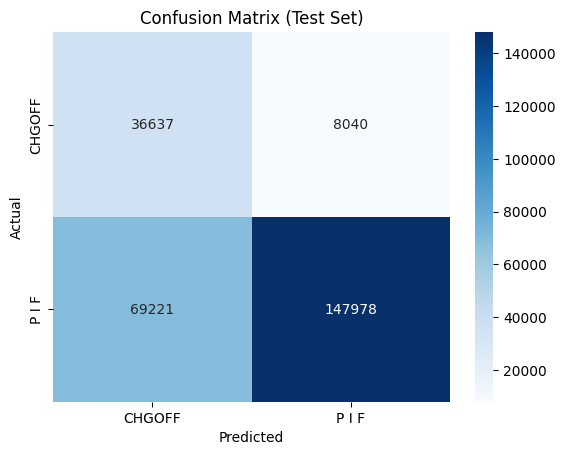

Total Net Profit/Loss: 1308398199.10
Average Total Net Profit/Loss: 4996.25


In [14]:
# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Oversample the training set
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 4: Fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Logistic Regression model with a max of 1000 iterations
logreg.fit(X_train_resampled, y_train_resampled)  # Train the model on the resampled training data

# Step 5: Make predictions for both training and test sets
y_train_pred = logreg.predict(X_train_resampled)  # Predict on the resampled training set
y_test_pred = logreg.predict(X_test)  # Predict on the test set

# Step 6: Evaluate the model for both training and test sets
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)  # Accuracy
    precision = precision_score(y_true, y_pred)  # Precision
    recall = recall_score(y_true, y_pred)  # Recall
    f1 = f1_score(y_true, y_pred)  # F1 Score
    return accuracy, precision, recall, f1

# Evaluate on resampled training set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train_resampled, y_train_pred)

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# Display the evaluation metrics for both sets
print("Training Set Metrics (Resampled):")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')

# Step 7: Confusion Matrix for both sets

# For resampled training set
cm_train = confusion_matrix(y_train_resampled, y_train_pred)  # Compute confusion matrix for training set
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

# For test set
cm_test = confusion_matrix(y_test, y_test_pred)  # Compute confusion matrix for test set
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Display Specificity for both sets
print(f'\nSpecificity (Training Set): {specificity_train:.4f}')
print(f'Specificity (Test Set): {specificity_test:.4f}')

# Plot confusion matrix for the test set as a heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

Training Set Metrics (Resampled):
Accuracy: 0.7710
Precision: 0.7907
Recall: 0.7372
F1 Score: 0.7630

Test Set Metrics:
Accuracy: 0.7537
Precision: 0.9252
Recall: 0.7384
F1 Score: 0.8213

Specificity (Training Set): 0.8049
Specificity (Test Set): 0.8037


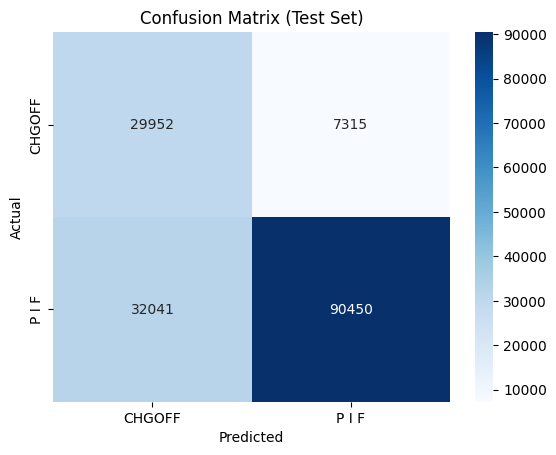

Total Net Profit/Loss: 578772376.10
Average Total Net Profit/Loss: 3622.81


In [15]:
# Step 1: Define features (X) and target (y)
X = df_new_unknown_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_unknown_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Oversample the training set
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 4: Fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)  # Logistic Regression model with a max of 1000 iterations
logreg.fit(X_train_resampled, y_train_resampled)  # Train the model on the resampled training data

# Step 5: Make predictions for both training and test sets
y_train_pred = logreg.predict(X_train_resampled)  # Predict on the resampled training set
y_test_pred = logreg.predict(X_test)  # Predict on the test set

# Step 6: Evaluate the model for both training and test sets
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)  # Accuracy
    precision = precision_score(y_true, y_pred)  # Precision
    recall = recall_score(y_true, y_pred)  # Recall
    f1 = f1_score(y_true, y_pred)  # F1 Score
    return accuracy, precision, recall, f1

# Evaluate on resampled training set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train_resampled, y_train_pred)

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# Display the evaluation metrics for both sets
print("Training Set Metrics (Resampled):")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')

# Step 7: Confusion Matrix for both sets

# For resampled training set
cm_train = confusion_matrix(y_train_resampled, y_train_pred)  # Compute confusion matrix for training set
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

# For test set
cm_test = confusion_matrix(y_test, y_test_pred)  # Compute confusion matrix for test set
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Display Specificity for both sets
print(f'\nSpecificity (Training Set): {specificity_train:.4f}')
print(f'Specificity (Test Set): {specificity_test:.4f}')

# Plot confusion matrix for the test set as a heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

Both models show good performance, with high accuracy, precision, recall, and F1 scores. However, there is a noticeable difference between the training and test set metrics for both models, suggesting that overfitting may be occurring. Specifically, both models perform better on the training data compared to the test data, which indicates that they might be too closely aligned with the training data and not generalizing well to new, unseen data.

- **Both models show high performance across key metrics:**
    - Accuracy, precision, recall, and F1 scores are all strong for both models.
- **Discrepancy between training and test set performance:**
    - Both models perform better on the training data, suggesting potential overfitting.
- **Indication of overfitting:**
    - The performance gap between the training and test sets is noticeable, signaling that the models may not generalize well to unseen data.

#### Logistic Regression with Weighted Classes: Balancing the Dataset

**Next Steps: Applying Balanced Weights to Improve Model Generalization**

To address potential overfitting and improve the model's ability to generalize, we will apply **balanced class weights**. This will automatically adjust the weights to ensure that the model gives equal importance to each class, particularly the underrepresented ones. By doing so, we aim to reduce bias toward the majority class and improve overall model performance, especially on unseen data.
- **Balanced Weights:** We will apply automatic balancing to ensure all classes are treated equally.
- **Reducing Bias:** This approach helps the model avoid favoring the majority class.
- **Improving Generalization:** We expect this to help the model generalize better, leading to more consistent performance across both training and test sets.

Training Set Metrics:
Accuracy: 0.7066
Precision: 0.9497
Recall: 0.6820
F1 Score: 0.7939

Test Set Metrics:
Accuracy: 0.7076
Precision: 0.9500
Recall: 0.6834
F1 Score: 0.7950

Specificity (Training Set): 0.8254
Specificity (Test Set): 0.8251


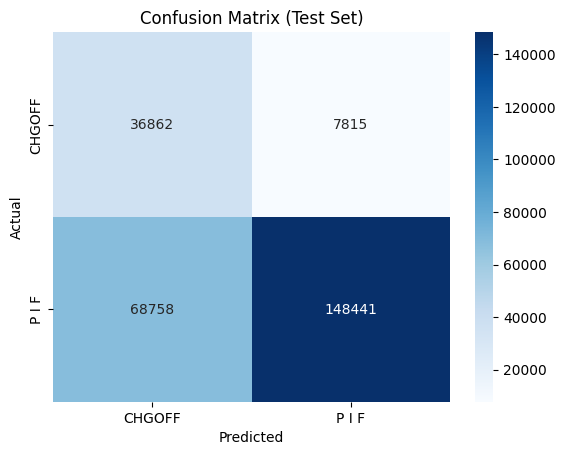

Total Net Profit/Loss: 1310858367.60
Average Total Net Profit/Loss: 5005.65


In [274]:
# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize specified columns using the training data for scaling
scaler = StandardScaler()

# Fit the scaler on the training set and transform the training set
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Transform the test set using the same scaler (without fitting again)
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Fit the logistic regression model with class weights
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')  # Logistic Regression model with class weights
logreg.fit(X_train, y_train)  # Train the model on the training data

# Step 5: Make predictions for both training and test sets
y_train_pred = logreg.predict(X_train)  # Predict on the training set
y_test_pred = logreg.predict(X_test)  # Predict on the test set

# Step 6: Evaluate the model for both training and test sets
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)  # Accuracy
    precision = precision_score(y_true, y_pred)  # Precision
    recall = recall_score(y_true, y_pred)  # Recall
    f1 = f1_score(y_true, y_pred)  # F1 Score
    return accuracy, precision, recall, f1

# Evaluate on training set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# Display the evaluation metrics for both sets
print("Training Set Metrics:")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')

# Step 7: Confusion Matrix for both sets

# For training set
cm_train = confusion_matrix(y_train, y_train_pred)  # Compute confusion matrix for training set
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

# For test set
cm_test = confusion_matrix(y_test, y_test_pred)  # Compute confusion matrix for test set
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Display Specificity for both sets
print(f'\nSpecificity (Training Set): {specificity_train:.4f}')
print(f'Specificity (Test Set): {specificity_test:.4f}')

# Plot confusion matrix for the test set as a heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

Training Set Metrics:
Accuracy: 0.7544
Precision: 0.9260
Recall: 0.7390
F1 Score: 0.8220

Test Set Metrics:
Accuracy: 0.7553
Precision: 0.9260
Recall: 0.7400
F1 Score: 0.8226

Specificity (Training Set): 0.8051
Specificity (Test Set): 0.8056


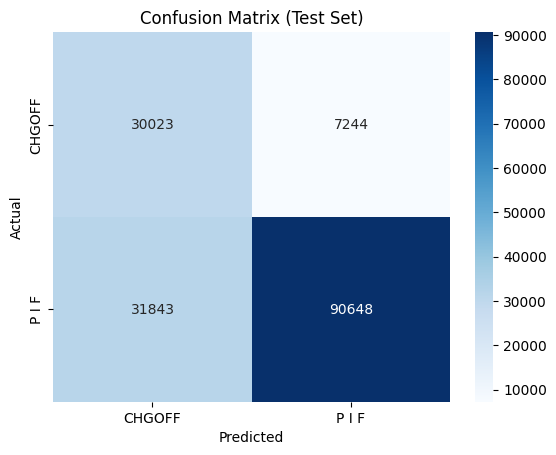

Total Net Profit/Loss: 584760871.20
Average Total Net Profit/Loss: 3660.29


In [18]:
# Step 1: Define features (X) and target (y)
X = df_new_unknown_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_unknown_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize specified columns using the training data for scaling
scaler = StandardScaler()

# Fit the scaler on the training set and transform the training set
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Transform the test set using the same scaler (without fitting again)
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Fit the logistic regression model with class weights
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')  # Logistic Regression model with class weights
logreg.fit(X_train, y_train)  # Train the model on the training data

# Step 5: Make predictions for both training and test sets
y_train_pred = logreg.predict(X_train)  # Predict on the training set
y_test_pred = logreg.predict(X_test)  # Predict on the test set

# Step 6: Evaluate the model for both training and test sets
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)  # Accuracy
    precision = precision_score(y_true, y_pred)  # Precision
    recall = recall_score(y_true, y_pred)  # Recall
    f1 = f1_score(y_true, y_pred)  # F1 Score
    return accuracy, precision, recall, f1

# Evaluate on training set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# Display the evaluation metrics for both sets
print("Training Set Metrics:")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')

# Step 7: Confusion Matrix for both sets

# For training set
cm_train = confusion_matrix(y_train, y_train_pred)  # Compute confusion matrix for training set
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

# For test set
cm_test = confusion_matrix(y_test, y_test_pred)  # Compute confusion matrix for test set
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Display Specificity for both sets
print(f'\nSpecificity (Training Set): {specificity_train:.4f}')
print(f'Specificity (Test Set): {specificity_test:.4f}')

# Plot confusion matrix for the test set as a heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

**Model Evaluation and Next Steps**

As observed from the metrics, the model with class weights has shown consistent performance across both the training and test sets, with the scores being nearly the same for each. This is an improvement over the models without weights and those that utilized oversampling, where a noticeable difference between training and test set metrics suggested potential overfitting. The class weights approach seems to help the model generalize better, providing more balanced and reliable results across both sets.

Additionally, when comparing the performance of the two feature sets, **df_new_dummies** consistently outperforms **df_new_unknown_dummies** across all three techniques (no weights, oversampling, and class weights). This indicates that **df_new_dummies** provides a more robust feature set for the model.

Given this, we will now focus on optimizing and refining the model using the df_new_dummies dataset, as it has shown the best overall performance with class weights.

**Key Points:**
- **Class weights model:** Metrics are consistent between training and test sets, showing improved generalization compared to models without weights and oversampling.
- **Performance comparison: df_new_dummies** outperforms **df_new_unknown_dummies** across all techniques, providing more robust results.
- **Next focus:** We will now concentrate on optimizing the model using **df_new_dummies**, as it has demonstrated the best performance with class weights.

#### Lasso Regression: Comparing Performance With and Without Weights

First up is **Lasso Regression**, where we will test both with and without class weights to compare the results. Lasso adds an L1 penalty, which can shrink some coefficients to zero, effectively performing feature selection. We expect it to simplify the model but might underperform if all features are important.

- **Lasso without weights:** We’ll apply Lasso with only the L1 penalty and no class weighting, which assumes balanced classes.
- **Lasso with weights:** We’ll apply Lasso with class weights set to 'balanced', which adjusts for imbalanced classes by giving more importance to the minority class.

We expect the weighted version to handle class imbalances better, but we'll compare the performance metrics to decide which approach works best.

Lasso Regression Metrics:
Training Set Metrics:
Accuracy: 0.8287
Precision: 0.8287
Recall: 1.0000
F1 Score: 0.9063
Specificity: 0.0000

Test Set Metrics:
Accuracy: 0.8294
Precision: 0.8294
Recall: 1.0000
F1 Score: 0.9067
Specificity: 0.0000


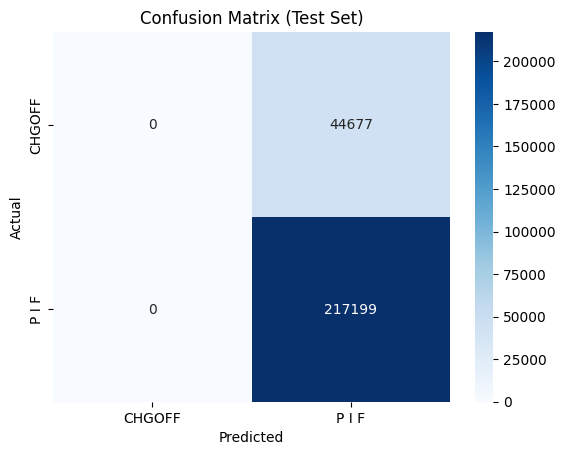

Total Net Profit/Loss: 846227280.95
Average Total Net Profit/Loss: 3231.40


In [41]:
# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize the training data and apply the same transformation to the test data
scaler = StandardScaler()

# Fit the scaler to the training data
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Apply the same transformation to the test data (using the scaler fitted on the training data)
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Fit the Lasso regression model with a specified alpha value (regularization strength)
lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = lasso.predict(X_train).round()  # Round predictions to the nearest class
y_test_pred = lasso.predict(X_test).round()  # Round predictions to the nearest class

# Evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Training set metrics
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Test set metrics
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Print metrics
print("Lasso Regression Metrics:")
print(f"Training Set Metrics:")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')
print(f'Specificity: {specificity_train:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')
print(f'Specificity: {specificity_test:.4f}')

# Plot confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

Logistic Regression with Lasso (L1) Regularization and Class Weights Metrics:
Training Set Metrics:
Accuracy: 0.7065
Precision: 0.9497
Recall: 0.6820
F1 Score: 0.7939
Specificity: 0.8252

Test Set Metrics:
Accuracy: 0.7075
Precision: 0.9500
Recall: 0.6834
F1 Score: 0.7949
Specificity: 0.8251


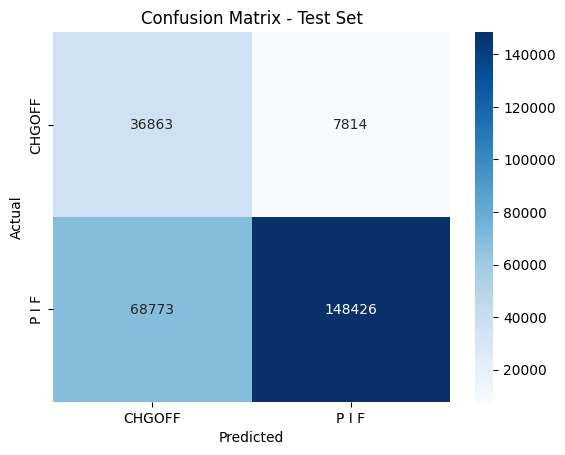

Total Net Profit/Loss: 1310786593.55
Average Total Net Profit/Loss: 5005.37


In [57]:
# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize specified columns (after splitting the data)
scaler = StandardScaler()

# Fit the scaler on the training data
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Apply the transformation to the test data using the scaler fitted on the training data
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Logistic Regression with Lasso Regularization (L1 penalty) and class weights
logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000)

# Fit the model
logreg_lasso.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = logreg_lasso.predict(X_train)
y_test_pred = logreg_lasso.predict(X_test)

# Step 6: Evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    return accuracy, precision, recall, f1

# Training set metrics
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Test set metrics
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Print metrics
print("Logistic Regression with Lasso (L1) Regularization and Class Weights Metrics:")
print(f"Training Set Metrics:")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')
print(f'Specificity: {specificity_train:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')
print(f'Specificity: {specificity_test:.4f}')

# Plot confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column 
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

**Lasso without weights:**
- The model struggled with imbalanced classes, achieving perfect **recall** (1.0000) for positives but a **specificity of 0**, meaning it failed to identify any negative cases. This resulted in decent overall **accuracy** (82.87%) but poor performance on the negative class, making it unsuitable for tasks needing balanced predictions.

**Lasso with weights:**
- Adding class weights improved performance significantly, with **specificity** of 0.8252, showing the model now correctly identifies negative cases. The **recall** for positives dropped slightly to 0.6834, but the model maintained strong **precision** (0.9500) and a well-balanced **F1 score** of 0.7949. Compared to **Logistic Regression with weights**, Lasso achieved similar results, demonstrating it can perform well with imbalanced classes.

#### Ridge Regression: Comparing Performance With and Without Weights

Next up is **Ridge Regression**, where we will test both with and without class weights to compare the results. Ridge adds an L2 penalty, shrinking coefficients without eliminating any features. It’s good for handling correlated features and preventing overfitting.
- **Ridge without weights:** We’ll apply Ridge with only the L2 penalty and no class weighting, assuming the classes are balanced.
- **Ridge with weights:** We’ll apply Ridge with class weights set to 'balanced', which adjusts for imbalanced classes by giving more importance to the minority class.

We expect the weighted version to handle class imbalances better, but we'll compare the performance metrics to determine which approach yields the best results.

Training Set Metrics:
Accuracy: 0.8286
Precision: 0.7188
Recall: 0.8286
F1 Score: 0.7510

Test Set Metrics:
Accuracy: 0.8294
Precision: 0.6879
Recall: 0.8294
F1 Score: 0.7520

Specificity (Training Set): 0.0000
Specificity (Test Set): 0.0000


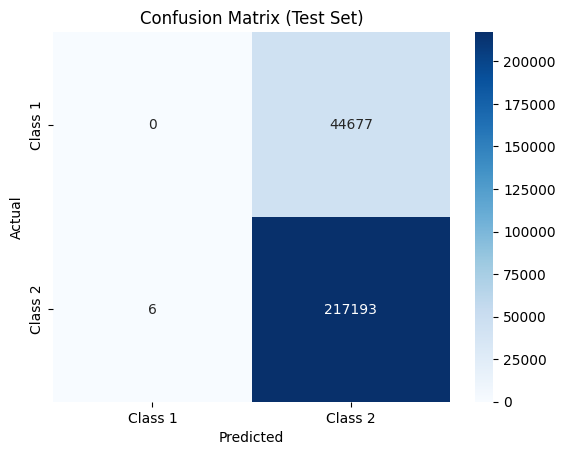

Total Net Profit/Loss: 844061401.75
Average Total Net Profit/Loss: 3223.13


In [64]:
# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize specified columns (only on the training set)
scaler = StandardScaler()
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Normalize the test set using the same scaler
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Fit the Ridge model with class weights
ridge = RidgeClassifier()  # Ridge model
ridge.fit(X_train, y_train)  # Train the model on the training data

# Step 5: Make predictions for both training and test sets
y_train_pred = ridge.predict(X_train)  # Predict on the training set
y_test_pred = ridge.predict(X_test)  # Predict on the test set

# Step 6: Evaluate the model for both training and test sets
def evaluate_model(y_true, y_pred, average='weighted'):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)
    return accuracy, precision, recall, f1

# Evaluate on training set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred, average='weighted')

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred, average='weighted')

# Display the evaluation metrics for both sets
print("Training Set Metrics:")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')

# Step 7: Confusion Matrix for both sets

# For training set
cm_train = confusion_matrix(y_train, y_train_pred)  # Compute confusion matrix for training set
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

# For test set
cm_test = confusion_matrix(y_test, y_test_pred)  # Compute confusion matrix for test set
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Display Specificity for both sets
print(f'\nSpecificity (Training Set): {specificity_train:.4f}')
print(f'Specificity (Test Set): {specificity_test:.4f}')

# Plot confusion matrix for the test set as a heatmap
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.xlabel('Predicted')  # X-axis label
plt.ylabel('Actual')  # Y-axis label
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

Logistic Regression with Ridge (L2) Regularization and Class Weights Metrics:
Training Set Metrics:
Accuracy: 0.7544
Precision: 0.9260
Recall: 0.7390
F1 Score: 0.8220
Specificity: 0.8051

Test Set Metrics:
Accuracy: 0.7553
Precision: 0.9260
Recall: 0.7400
F1 Score: 0.8226
Specificity: 0.8056


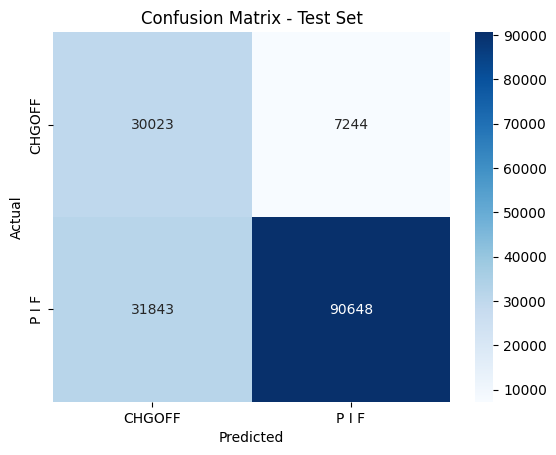

Total Net Profit/Loss: 584760871.20
Average Total Net Profit/Loss: 3660.29


In [66]:
# Step 1: Define features (X) and target (y)
X = df_new_unknown_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_unknown_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize specified columns (only on the training set)
scaler = StandardScaler()
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Normalize the test set using the same scaler (without fitting again)
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Logistic Regression with Ridge Regularization (L2 penalty) and class weights
logreg_ridge = LogisticRegression(penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=1000)

# Fit the model
logreg_ridge.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = logreg_ridge.predict(X_train)
y_test_pred = logreg_ridge.predict(X_test)

# Step 6: Evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    return accuracy, precision, recall, f1

# Training set metrics
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Test set metrics
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Print metrics
print("Logistic Regression with Ridge (L2) Regularization and Class Weights Metrics:")
print(f"Training Set Metrics:")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')
print(f'Specificity: {specificity_train:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')
print(f'Specificity: {specificity_test:.4f}')

# Plot confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

**Ridge without Weights:**
- The Ridge regression model without class weights showed decent **accuracy** (82.86%) and **recall** (82.86%), but had poor **specificity** (0.0000). This is likely because the model did not account for class imbalance, which led to a bias towards predicting the majority class. As a result, the **precision** (71.88%) was lower, as the model struggled to correctly identify the minority class.

**Ridge with Weights:**
- When class weights were applied, Ridge's performance improved significantly, with higher **precision** (92.60%), **recall** (73.90%), **F1 score** (82.20%), and **specificity** (80.51%). The weights helped the model focus more on the minority class, improving its ability to make balanced predictions. However, despite these improvements, Ridge with weights still did not perform as well as **Logistic Regression with weights**, which achieved better overall metrics, likely due to the more flexible nature of logistic regression in handling imbalanced data.

#### Elastic Net Regression: Comparing Performance With and Without Weights

Next up is **Elastic Net Regression**, where we will test both with and without class weights to compare the results. Elastic Net combines Lasso and Ridge, balancing both L1 and L2 penalties. It should work well when features are both sparse and correlated.
- **Elastic Net without weights:** We’ll apply Elastic Net with a combination of L1 and L2 penalties but no class weighting, assuming the classes are balanced.
- **Elastic Net with weights:** We’ll apply Elastic Net with class weights set to 'balanced', which adjusts for imbalanced classes by giving more importance to the minority class.

We expect the weighted version to handle class imbalances better, but we’ll compare the performance metrics to determine which approach yields the best results.

Elastic Net Regression Metrics:
Training Set Metrics:
Accuracy: 0.8477
Precision: 0.8582
Recall: 0.9778
F1 Score: 0.9141
Specificity: 0.2186

Test Set Metrics:
Accuracy: 0.8482
Precision: 0.8586
Recall: 0.9780
F1 Score: 0.9144
Specificity: 0.2172


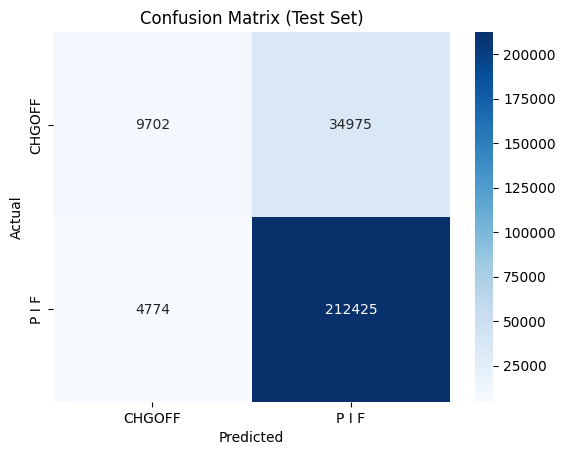

Total Net Profit/Loss: 1021669437.35
Average Total Net Profit/Loss: 3901.35


In [72]:
# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize the training data and apply the same transformation to the test data
scaler = StandardScaler()

# Fit the scaler to the training data
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Apply the same transformation to the test data (using the scaler fitted on the training data)
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Fit the ElasticNet regression model with a specified alpha value (regularization strength) and l1_ratio
elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)  # 0.5 is a balanced mix of L1 and L2 penalties
elasticnet.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = elasticnet.predict(X_train)  # No need to round predictions, as logistic regression gives probabilities
y_test_pred = elasticnet.predict(X_test)  # No need to round predictions

# Evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Training set metrics
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Test set metrics
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Print metrics
print("Elastic Net Regression Metrics:")
print(f"Training Set Metrics:")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')
print(f'Specificity: {specificity_train:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')
print(f'Specificity: {specificity_test:.4f}')

# Plot confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

Elastic Net Regression Metrics:
Training Set Metrics:
Accuracy: 0.7065
Precision: 0.9497
Recall: 0.6820
F1 Score: 0.7939
Specificity: 0.8252

Test Set Metrics:
Accuracy: 0.7076
Precision: 0.9500
Recall: 0.6834
F1 Score: 0.7949
Specificity: 0.8251


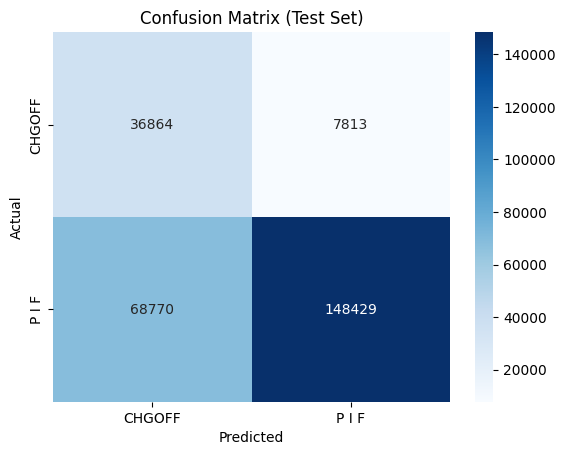

Total Net Profit/Loss: 1310882921.75
Average Total Net Profit/Loss: 5005.74


In [74]:
# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize the training data and apply the same transformation to the test data
scaler = StandardScaler()

# Fit the scaler to the training data
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Apply the same transformation to the test data (using the scaler fitted on the training data)
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Fit the ElasticNet regression model with a specified alpha value (regularization strength) and l1_ratio
elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000, class_weight='balanced')  # class_weight='balanced' adds automatic weighting
elasticnet.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = elasticnet.predict(X_train)  # No need to round predictions, as logistic regression gives probabilities
y_test_pred = elasticnet.predict(X_test)  # No need to round predictions

# Evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Training set metrics
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Test set metrics
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

TN_train, FP_train, FN_train, TP_train = cm_train.ravel()
specificity_train = TN_train / (TN_train + FP_train)

TN_test, FP_test, FN_test, TP_test = cm_test.ravel()
specificity_test = TN_test / (TN_test + FP_test)

# Print metrics
print("Elastic Net Regression Metrics:")
print(f"Training Set Metrics:")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1 Score: {train_f1:.4f}')
print(f'Specificity: {specificity_train:.4f}')

print("\nTest Set Metrics:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1 Score: {test_f1:.4f}')
print(f'Specificity: {specificity_test:.4f}')

# Plot confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['CHGOFF', 'P I F'], yticklabels=['CHGOFF', 'P I F'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Test Set)')
plt.show()

# Combine actual and predicted values into a DataFrame
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

def calculate_profit_loss(row):
    if row['Predicted'] == 0:  # Predicted as default
        return 0  # No profit or loss for prediction as default
    
    elif row['Predicted'] == 1:  # Predicted as paid in full
        if row['Actual'] == 0:  # Actually defaulted
            return -5 * 0.05 * row['Disbursement_Gross']  # Loss due to incorrect prediction
        else:  # Actually paid in full
            return 0.05 * row['Disbursement_Gross']  # Profit due to correct prediction

# Merge df_new and results on the index or appropriate column
df_combined = df_new.join(results)

df_combined['Profit_Loss'] = df_combined.apply(calculate_profit_loss, axis=1)

# Calculate the total net profit/loss by summing the 'Profit_Loss' column
total_net = df_combined['Profit_Loss'].sum()

# Print the total net profit/loss
print(f"Total Net Profit/Loss: {total_net:.2f}")

average_total_net = total_net / (results.shape[0])

print(f"Average Total Net Profit/Loss: {average_total_net:.2f}")

**ElasticNet without weights:**

- The model showed excellent **recall** (0.9778) for the positive class but a **specificity** of 0.2186, indicating it struggled to identify negative cases. Despite the high **accuracy** (84.77%), the **low specificity** reflects the model's bias toward predicting the majority class, making it less effective for tasks requiring balanced predictions.

**ElasticNet with weights:**

- The model's **accuracy** dropped to 70.65%, but **specificity** improved significantly to 0.8252, showing a better balance between correctly identifying both positive and negative cases. Performance with weights was similar to **Logistic Regression** and **Lasso with weights**, offering improved performance for imbalanced datasets while sacrificing some overall accuracy.

Out of all the models evaluated, the three best-performing ones were **Logistic Regression with weights**, **Lasso Regression with weights**, and **ElasticNet with weights**. These models stood out based on their ability to effectively balance performance metrics and average total net profit/loss.

To further refine the analysis and determine the most suitable model for our needs, we will evaluate them against several criteria:

1. **Run Time:**
The computational efficiency of each model will be analyzed to assess how quickly they can process data during both training and prediction. This metric is critical for scalability, especially as the dataset grows in size or complexity.

2. **Future Scalability:**
We will examine the scalability of these models to larger datasets and more complex features, ensuring their ability to maintain performance and computational efficiency as the data environment evolves.

3. **Performance Metrics:**

    - **ROC Curve:**
    The Area Under the Curve (AUC) will help compare the classification accuracy and ability to distinguish between classes for each model.
    - **Gain and Lift Charts:**
    These charts will provide insights into the effectiveness of each model in identifying high-value segments, which is especially relevant for business applications and targeted strategies.

This systematic evaluation will help select the most robust model that balances performance with practical application in a scalable, real-world scenario.

#### Logistic Regression with Weights: Performance Metrics

In [108]:
# Start timing
start_time = time.time()

# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize specified columns using the training data for scaling
scaler = StandardScaler()

# Fit the scaler on the training set and transform the training set
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Transform the test set using the same scaler (without fitting again)
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Fit the logistic regression model with class weights
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')  # Logistic Regression model with class weights
logreg.fit(X_train, y_train)  # Train the model on the training data

# Step 5: Make predictions for both training and test sets
y_train_pred = logreg.predict(X_train)  # Predict on the training set
y_test_pred = logreg.predict(X_test)  # Predict on the test set

# Step 6: Evaluate the model for both training and test sets
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)  # Accuracy
    precision = precision_score(y_true, y_pred)  # Precision
    recall = recall_score(y_true, y_pred)  # Recall
    f1 = f1_score(y_true, y_pred)  # F1 Score
    return accuracy, precision, recall, f1

# Evaluate on training set
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Evaluate on test set
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# End timing
end_time = time.time()

# Calculate and print elapsed time
elapsed_time = end_time - start_time
print(f"\nElapsed Time: {elapsed_time:.2f} seconds")


Elapsed Time: 2.89 seconds


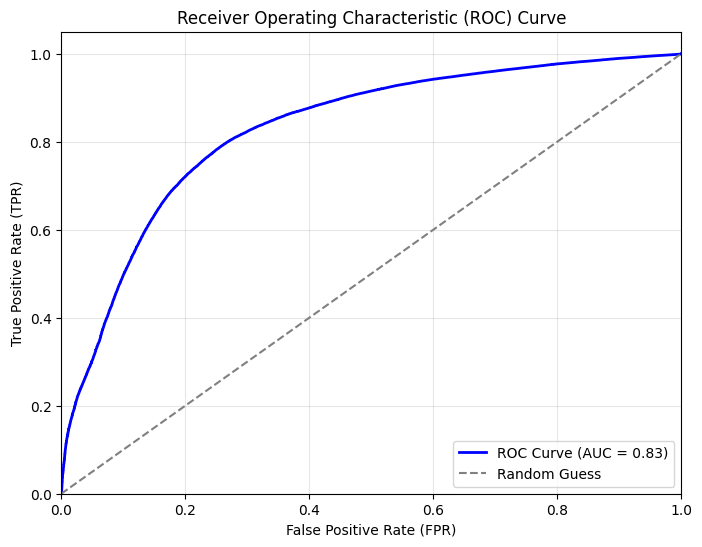

In [110]:
# Calculate probabilities for the positive class
y_test_proba = logreg.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

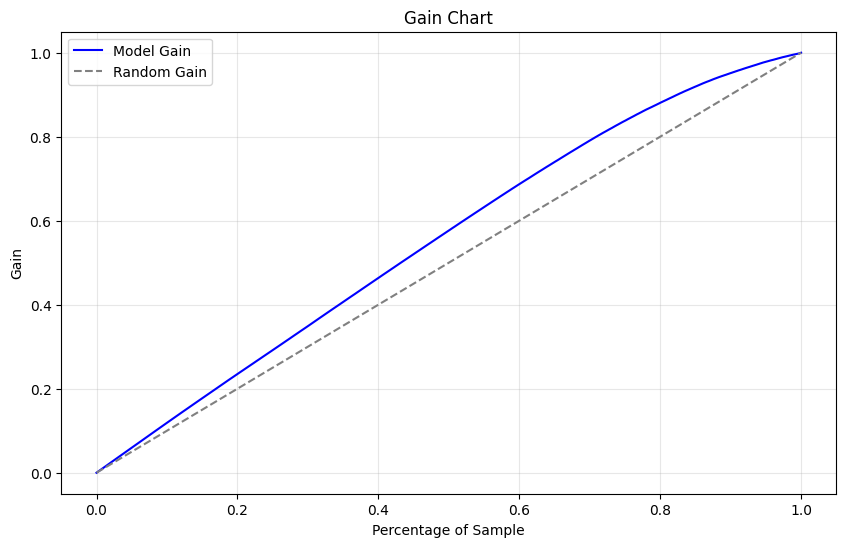

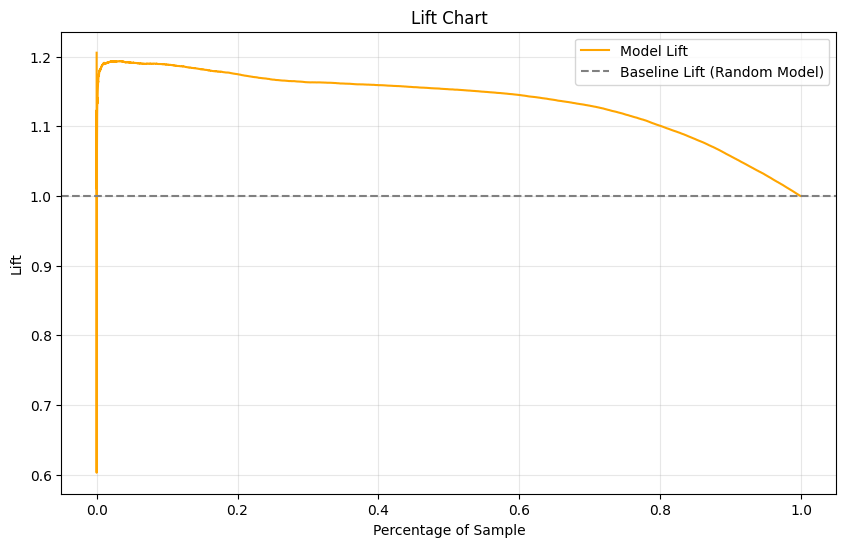

In [112]:
# Calculate probabilities for the positive class
y_test_proba = logreg.predict_proba(X_test)[:, 1]

# Create a dataframe with actual and predicted probabilities
results = pd.DataFrame({
    'actual': y_test,
    'proba': y_test_proba
})

# Sort the dataframe by predicted probabilities in descending order
results = results.sort_values(by='proba', ascending=False).reset_index(drop=True)

# Add a cumulative sum of actual positives and total rows
results['cumulative_positives'] = results['actual'].cumsum()
results['cumulative_total'] = np.arange(1, len(results) + 1)

# Calculate Gain
total_positives = results['actual'].sum()
results['gain'] = results['cumulative_positives'] / total_positives

# Calculate Lift
results['lift'] = results['gain'] / (results['cumulative_total'] / len(results))

# Gain chart
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(results) + 1) / len(results), results['gain'], label='Model Gain', color='blue')
plt.plot([0, 1], [0, 1], label='Random Gain', linestyle='--', color='gray')  # Random model as reference
plt.title('Gain Chart')
plt.xlabel('Percentage of Sample')
plt.ylabel('Gain')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Lift chart
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(results) + 1) / len(results), results['lift'], label='Model Lift', color='orange')
plt.axhline(1, color='gray', linestyle='--', label='Baseline Lift (Random Model)')
plt.title('Lift Chart')
plt.xlabel('Percentage of Sample')
plt.ylabel('Lift')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#### Lasso Regression with Weights: Performance Metrics

In [104]:
# Start timing
start_time = time.time()

# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize specified columns (after splitting the data)
scaler = StandardScaler()

# Fit the scaler on the training data
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Apply the transformation to the test data using the scaler fitted on the training data
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Logistic Regression with Lasso Regularization (L1 penalty) and class weights
logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000)

# Fit the model
logreg_lasso.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = logreg_lasso.predict(X_train)
y_test_pred = logreg_lasso.predict(X_test)

# Step 6: Evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    return accuracy, precision, recall, f1

# Training set metrics
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Test set metrics
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# End timing
end_time = time.time()

# Calculate and print elapsed time
elapsed_time = end_time - start_time
print(f"\nElapsed Time: {elapsed_time:.2f} seconds")


Elapsed Time: 4.28 seconds


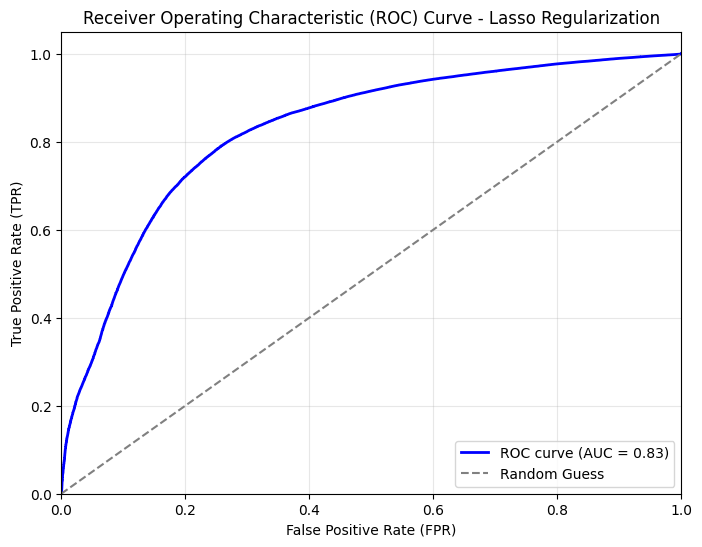

In [106]:
# Calculate probabilities for the positive class
y_test_proba = logreg_lasso.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Lasso Regularization')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

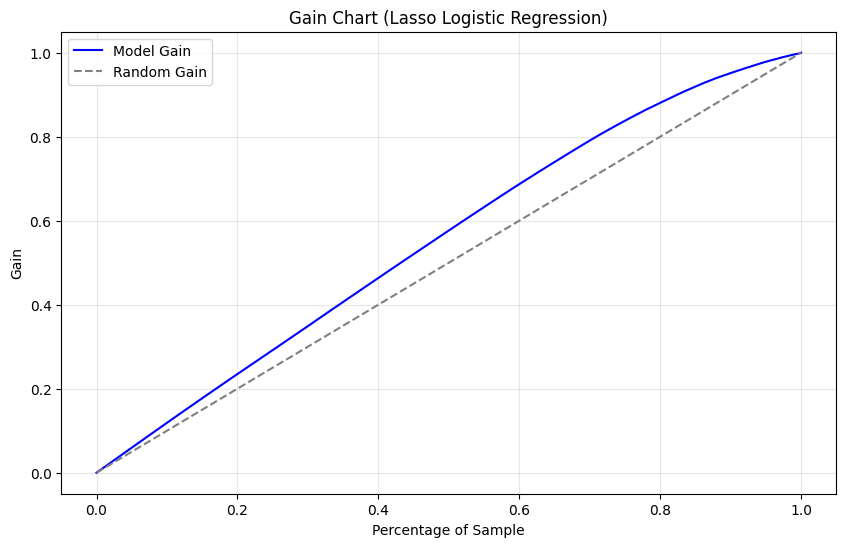

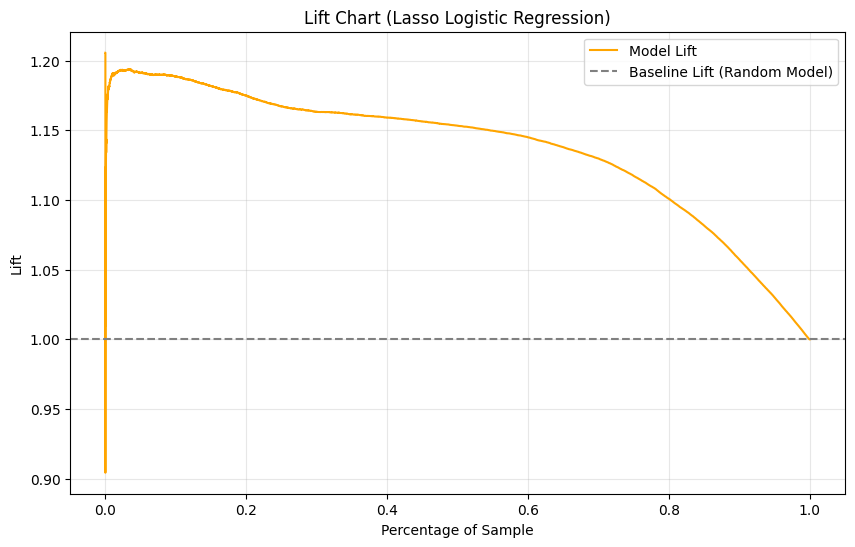

In [114]:
# Step 1: Predict probabilities for the positive class using Lasso Logistic Regression
y_test_proba_lasso = logreg_lasso.predict_proba(X_test)[:, 1]

# Step 2: Create a dataframe with actual values and predicted probabilities
results_lasso = pd.DataFrame({
    'actual': y_test,
    'proba': y_test_proba_lasso
})

# Step 3: Sort the dataframe by predicted probabilities in descending order
results_lasso = results_lasso.sort_values(by='proba', ascending=False).reset_index(drop=True)

# Step 4: Calculate cumulative sums for positives and total rows
results_lasso['cumulative_positives'] = results_lasso['actual'].cumsum()
results_lasso['cumulative_total'] = np.arange(1, len(results_lasso) + 1)

# Step 5: Compute Gain and Lift
total_positives = results_lasso['actual'].sum()
results_lasso['gain'] = results_lasso['cumulative_positives'] / total_positives
results_lasso['lift'] = results_lasso['gain'] / (results_lasso['cumulative_total'] / len(results_lasso))

# Step 6: Plot Gain Chart
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(results_lasso) + 1) / len(results_lasso), results_lasso['gain'], label='Model Gain', color='blue')
plt.plot([0, 1], [0, 1], label='Random Gain', linestyle='--', color='gray')  # Random model as reference
plt.title('Gain Chart (Lasso Logistic Regression)')
plt.xlabel('Percentage of Sample')
plt.ylabel('Gain')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Step 7: Plot Lift Chart
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(results_lasso) + 1) / len(results_lasso), results_lasso['lift'], label='Model Lift', color='orange')
plt.axhline(1, color='gray', linestyle='--', label='Baseline Lift (Random Model)')
plt.title('Lift Chart (Lasso Logistic Regression)')
plt.xlabel('Percentage of Sample')
plt.ylabel('Lift')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


#### ElasticNet with Weights: Performance Metrics

In [96]:
# Start timing
start_time = time.time()

# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize the training data and apply the same transformation to the test data
scaler = StandardScaler()

# Fit the scaler to the training data
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Apply the same transformation to the test data (using the scaler fitted on the training data)
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Fit the ElasticNet regression model with a specified alpha value (regularization strength) and l1_ratio
elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000, class_weight='balanced')  # class_weight='balanced' adds automatic weighting
elasticnet.fit(X_train, y_train)

# Step 5: Make predictions
y_train_pred = elasticnet.predict(X_train)  # No need to round predictions, as logistic regression gives probabilities
y_test_pred = elasticnet.predict(X_test)  # No need to round predictions

# Evaluate the model
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

# Training set metrics
train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)

# Test set metrics
test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

# End timing
end_time = time.time()

# Calculate and print elapsed time
elapsed_time = end_time - start_time
print(f"\nElapsed Time: {elapsed_time:.2f} seconds")


Elapsed Time: 300.39 seconds


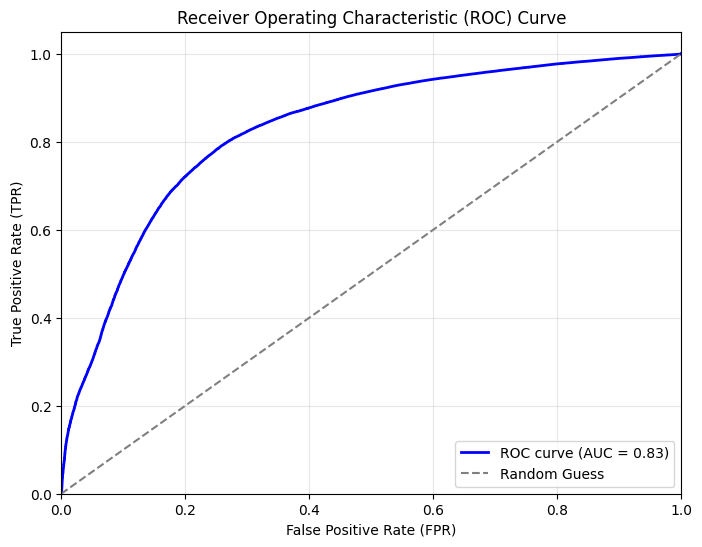

In [99]:
# Calculate probabilities for the positive class
y_test_proba = elasticnet.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

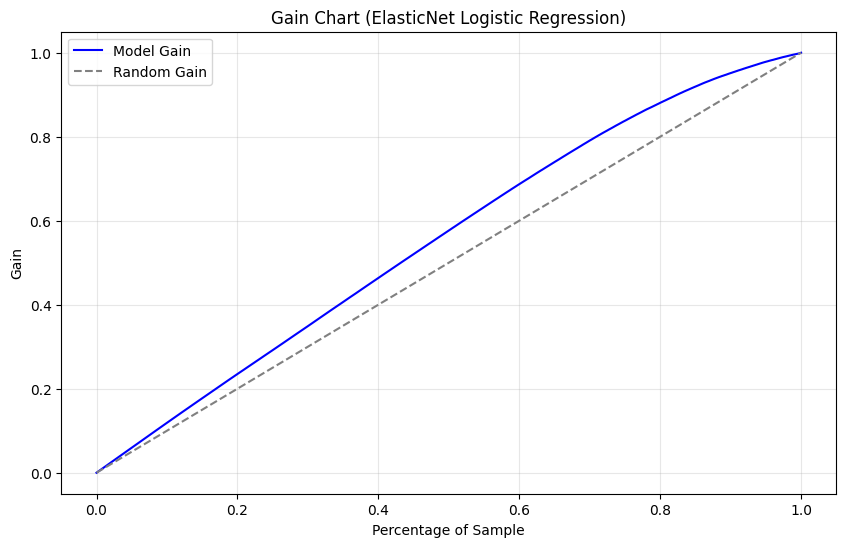

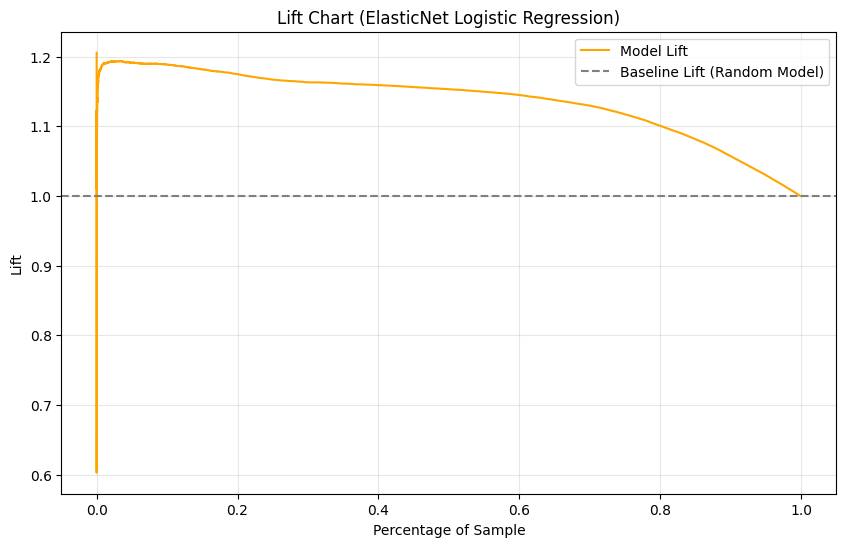

In [116]:
# Step 1: Predict probabilities for the positive class using ElasticNet Logistic Regression
y_test_proba_elasticnet = elasticnet.predict_proba(X_test)[:, 1]

# Step 2: Create a dataframe with actual values and predicted probabilities
results_elasticnet = pd.DataFrame({
    'actual': y_test,
    'proba': y_test_proba_elasticnet
})

# Step 3: Sort the dataframe by predicted probabilities in descending order
results_elasticnet = results_elasticnet.sort_values(by='proba', ascending=False).reset_index(drop=True)

# Step 4: Calculate cumulative sums for positives and total rows
results_elasticnet['cumulative_positives'] = results_elasticnet['actual'].cumsum()
results_elasticnet['cumulative_total'] = np.arange(1, len(results_elasticnet) + 1)

# Step 5: Compute Gain and Lift
total_positives = results_elasticnet['actual'].sum()
results_elasticnet['gain'] = results_elasticnet['cumulative_positives'] / total_positives
results_elasticnet['lift'] = results_elasticnet['gain'] / (results_elasticnet['cumulative_total'] / len(results_elasticnet))

# Step 6: Plot Gain Chart
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(results_elasticnet) + 1) / len(results_elasticnet), results_elasticnet['gain'], label='Model Gain', color='blue')
plt.plot([0, 1], [0, 1], label='Random Gain', linestyle='--', color='gray')  # Random model as reference
plt.title('Gain Chart (ElasticNet Logistic Regression)')
plt.xlabel('Percentage of Sample')
plt.ylabel('Gain')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Step 7: Plot Lift Chart
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(results_elasticnet) + 1) / len(results_elasticnet), results_elasticnet['lift'], label='Model Lift', color='orange')
plt.axhline(1, color='gray', linestyle='--', label='Baseline Lift (Random Model)')
plt.title('Lift Chart (ElasticNet Logistic Regression)')
plt.xlabel('Percentage of Sample')
plt.ylabel('Lift')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

####  K-Fold Cross-Validation for Logistic Regression with Weights

In [269]:
# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Normalize specified columns using the training data for scaling
scaler = StandardScaler()

# Fit the scaler on the training set and transform the training set
X[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 3: Initialize logistic regression model with class weights
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Step 4: Initialize Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the performance metrics for each fold
precision_list = []
recall_list = []
f1_list = []
accuracy_list = []
specificity_list = []

# Step 5: Perform K-Fold cross-validation
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    logreg.fit(X_train_fold, y_train_fold)
    
    # Predict on the test set
    y_test_pred_fold = logreg.predict(X_test_fold)
    
    # Compute metrics
    accuracy = accuracy_score(y_test_fold, y_test_pred_fold)
    precision = precision_score(y_test_fold, y_test_pred_fold)
    recall = recall_score(y_test_fold, y_test_pred_fold)
    f1 = f1_score(y_test_fold, y_test_pred_fold)
    
    # Specificity = TN / (TN + FP) where TN is True Negatives and FP is False Positives
    cm = confusion_matrix(y_test_fold, y_test_pred_fold)
    tn, fp, fn, tp = cm.ravel()  # Unpack the confusion matrix
    specificity = tn / (tn + fp)
    
    # Append the metrics for this fold (convert to float to avoid np.float64 type)
    accuracy_list.append(float(accuracy))
    precision_list.append(float(precision))
    recall_list.append(float(recall))
    f1_list.append(float(f1))
    specificity_list.append(float(specificity))

# Step 6: Calculate average metrics across all folds
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)
avg_specificity = np.mean(specificity_list)

# Step 7: Output the metrics for each fold and their averages
print("Metrics for each fold:")
for i in range(kf.get_n_splits()):
    print(f"Fold {i+1} - Precision: {round(precision_list[i], 4)}, Recall: {round(recall_list[i], 4)}, F1 Score: {round(f1_list[i], 4)}, Accuracy: {round(accuracy_list[i], 4)}, Specificity: {round(specificity_list[i], 4)}")

print("\nAverage Metrics Across All Folds:")
print(f"Average Accuracy: {round(avg_accuracy, 4)}")
print(f"Average Precision: {round(avg_precision, 4)}")
print(f"Average Recall: {round(avg_recall, 4)}")
print(f"Average F1 Score: {round(avg_f1, 4)}")
print(f"Average Specificity: {round(avg_specificity, 4)}")

Metrics for each fold:
Fold 1 - Precision: 0.9505, Recall: 0.683, F1 Score: 0.7948, Accuracy: 0.7077, Specificity: 0.8277
Fold 2 - Precision: 0.949, Recall: 0.6802, F1 Score: 0.7924, Accuracy: 0.7046, Specificity: 0.8231
Fold 3 - Precision: 0.9492, Recall: 0.6834, F1 Score: 0.7946, Accuracy: 0.7073, Specificity: 0.8229
Fold 4 - Precision: 0.9509, Recall: 0.6784, F1 Score: 0.7919, Accuracy: 0.7044, Specificity: 0.8304
Fold 5 - Precision: 0.9492, Recall: 0.6808, F1 Score: 0.7929, Accuracy: 0.7053, Specificity: 0.8236

Average Metrics Across All Folds:
Average Accuracy: 0.7059
Average Precision: 0.9498
Average Recall: 0.6812
Average F1 Score: 0.7933
Average Specificity: 0.8255


The K-Fold cross-validation results for the **Logistic Regression with Weights** model showed consistent performance across all folds. All metrics—accuracy, precision, recall, F1 score, and specificity—remained similar, indicating the model's stability and ability to generalize well across different data subsets.

####  K-Fold Cross-Validation for Lasso Regression with Weights

In [324]:
# Step 1: Define features (X) and target (y)
X = df_new_dummies.drop(columns=['Loan_Status'])  # Features (all columns except 'Loan_Status')
y = df_new_dummies['Loan_Status']  # Target (the 'Loan_Status' column)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Normalize specified columns (after splitting the data)
scaler = StandardScaler()

# Fit the scaler on the training data
X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.fit_transform(X_train[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Apply the transformation to the test data using the scaler fitted on the training data
X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']] = scaler.transform(X_test[['Loan_Term', 'Number_Of_Employees', 'Disbursement_Gross']])

# Step 4: Logistic Regression with Lasso Regularization (L1 penalty) and class weights
logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000)

# Fit the model
logreg_lasso.fit(X_train, y_train)

# Step 4: Initialize Stratified K-Fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the performance metrics for each fold
precision_list = []
recall_list = []
f1_list = []
accuracy_list = []
specificity_list = []

# Step 5: Perform K-Fold cross-validation
for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    logreg_lasso.fit(X_train_fold, y_train_fold)
    
    # Predict on the test set
    y_test_pred_fold = logreg_lasso.predict(X_test_fold)
    
    # Compute metrics
    accuracy = accuracy_score(y_test_fold, y_test_pred_fold)
    precision = precision_score(y_test_fold, y_test_pred_fold)
    recall = recall_score(y_test_fold, y_test_pred_fold)
    f1 = f1_score(y_test_fold, y_test_pred_fold)
    
    # Specificity = TN / (TN + FP) where TN is True Negatives and FP is False Positives
    cm = confusion_matrix(y_test_fold, y_test_pred_fold)
    tn, fp, fn, tp = cm.ravel()  # Unpack the confusion matrix
    specificity = tn / (tn + fp)
    
    # Append the metrics for this fold (convert to float to avoid np.float64 type)
    accuracy_list.append(float(accuracy))
    precision_list.append(float(precision))
    recall_list.append(float(recall))
    f1_list.append(float(f1))
    specificity_list.append(float(specificity))

# Step 6: Calculate average metrics across all folds
avg_accuracy = np.mean(accuracy_list)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)
avg_f1 = np.mean(f1_list)
avg_specificity = np.mean(specificity_list)

# Step 7: Output the metrics for each fold and their averages
print("Metrics for each fold:")
for i in range(kf.get_n_splits()):
    print(f"Fold {i+1} - Precision: {round(precision_list[i], 4)}, Recall: {round(recall_list[i], 4)}, F1 Score: {round(f1_list[i], 4)}, Accuracy: {round(accuracy_list[i], 4)}, Specificity: {round(specificity_list[i], 4)}")

print("\nAverage Metrics Across All Folds:")
print(f"Average Accuracy: {round(avg_accuracy, 4)}")
print(f"Average Precision: {round(avg_precision, 4)}")
print(f"Average Recall: {round(avg_recall, 4)}")
print(f"Average F1 Score: {round(avg_f1, 4)}")
print(f"Average Specificity: {round(avg_specificity, 4)}")

Metrics for each fold:
Fold 1 - Precision: 0.9504, Recall: 0.6828, F1 Score: 0.7947, Accuracy: 0.7076, Specificity: 0.8276
Fold 2 - Precision: 0.949, Recall: 0.68, F1 Score: 0.7923, Accuracy: 0.7045, Specificity: 0.823
Fold 3 - Precision: 0.9493, Recall: 0.6833, F1 Score: 0.7946, Accuracy: 0.7072, Specificity: 0.8231
Fold 4 - Precision: 0.9508, Recall: 0.6785, F1 Score: 0.7919, Accuracy: 0.7044, Specificity: 0.8298
Fold 5 - Precision: 0.9493, Recall: 0.681, F1 Score: 0.7931, Accuracy: 0.7055, Specificity: 0.8237

Average Metrics Across All Folds:
Average Accuracy: 0.7058
Average Precision: 0.9497
Average Recall: 0.6811
Average F1 Score: 0.7933
Average Specificity: 0.8254


The K-Fold cross-validation results for the **Lasso Regression with Weights** model showed consistent performance across all folds. All metrics—accuracy, precision, recall, F1 score, and specificity—remained similar, indicating the model's stability and ability to generalize well across different data subsets.

#### Conclusions

In this analysis, we evaluated two different dataframes, **df_new_dummies** and **df_new_unknown_dummies**, across several models to determine which data preparation method and model performed best. After comparing the results, we found that **df_new_dummies** outperformed **df_new_unknown_dummies** on all models. This suggests that keeping the unknown values in the dataset was beneficial for model performance, and therefore, we will focus on **df_new_dummies** moving forward.

**Key Findings:**
- **df_new_dummies** performed better than **df_new_unknown_dummies** across all models, making it the preferred dataframe for further analysis.
- The **Logistic Regression** model initially performed well in terms of accuracy but had low **specificity** and **net profits**, indicating that it wasn't suitable for scenarios like bank loan approval where both positives and negatives need to be accurately identified.

**Approaches Tested:**
- **Oversampling:** Tried balancing the dataset using oversampling, which improved metrics but led to **overfitting** (variations between training and testing metrics). This would hurt the model's ability to generalize to new data.
- **Adding Class Weights:** Introduced class weights, which significantly improved **specificity**, **accuracy**, and **net profits**, making the model more suitable for the bank loan scenario.

**Model Selection and Results**
After performing the necessary adjustments, we focused on **df_new_dummies** and tested several models:

**Models Tested:**
- Logistic Regression
- Lasso Regression
- Ridge Regression
- ElasticNet

**Findings:**
- **Without weights**, all models underperformed, particularly in terms of specificity.
- **With weights**, both **Lasso** and **ElasticNet** performed similarly to **Logistic Regression**, achieving comparable metrics.

**Performance Evaluation:**
- **Elapsed Time:**
    - Logistic Regression: 2.89 seconds
    - Lasso: 4.28 seconds
    - ElasticNet: 300.39 seconds
- **ROC Curve:** All models showed similar **AUC = 0.83**.
- **Lift and Gain Charts:** All models displayed comparable results, indicating similar performance in identifying key cases.

**Recommendations for the Bank**
- **Choose Logistic Regression or Lasso:**
    - **Logistic Regression** and **Lasso** performed similarly and are the best options for real-time deployment due to their faster training times.
    - If computational efficiency is a top priority, **Logistic Regression** and **Lasso** should be prioritized.
- **Consider Adding Class Weights:**
    - Adding class weights significantly improved **specificity**, **accuracy**, and **net profits**, which are essential in a bank loan context.
    - Using class weights balances the data and avoids the risk of overfitting, ensuring better generalization to unseen data.
- **Monitor Overfitting:**
    - Avoid oversampling as it may lead to overfitting, where the model fits too closely to the training data and performs poorly on new data.
    - **Class weights** offer a better solution without the risk of overfitting.
- **Time Sensitivity:**
    - If time is a critical factor, choose **Logistic Regression** or **Lasso** as they offer similar performance with much faster computation times compared to **ElasticNet**.
 
**Conclusion Summary:**
- **df_new_dummies** is the preferred dataframe.
- **Logistic Regression** or **Lasso** (with weights) are the best models, offering good performance with efficient computation times.
- Ensure to incorporate **class weights** to handle class imbalance effectively, which is essential in the bank loan approval scenario.